# BCSE209P – Machine Learning Lab
Name: Siddhartha Pathak

Reg No. 21BCE3930


b) Suppose you have height and weight data for a group of people. For example: Heights are in feet,
like 6.5, and weight is in grams, like 80000. In many machine learning situations, you want to normalize
the data — scale the data so that the values in different columns have roughly the same magnitude
so that large values (like the weight) don’t overwhelm smaller values (like the heights). Create a raw
data of minimum 650 records of height and weight in above mentioned format and use MinMax
Normalization to normalize the weights in the range from as well as use Zscore to normalize the
weights.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data
num_records = 650
heights = np.random.uniform(4.5, 7.0, num_records)  # Heights in feet
weights = np.random.uniform(50000, 120000, num_records)  # Weights in grams

# Combine into a DataFrame
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights
})


In [8]:
# Display original data
print("Original Data:")
data


Original Data:


,Height,Weight
0,5.436350,56084.420166
1,6.876786,87597.457927
2,6.329985,91078.878261
3,5.996646,102180.763193
4,4.890047,80216.168236
...,...,...
645,6.726318,64010.517097
646,5.983981,61723.780758
647,6.197756,57319.748823
648,6.472928,94550.117468


In [9]:
data.head()

,Height,Weight
0,5.436350,56084.420166
1,6.876786,87597.457927
2,6.329985,91078.878261
3,5.996646,102180.763193
4,4.890047,80216.168236


# Min-Max Normalization

In [10]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data['Weight_MinMax'] = min_max_scaler.fit_transform(data[['Weight']])

# Display the first few rows after Min-Max Normalization
print("\nData after Min-Max Normalization:")
print(data[['Weight', 'Weight_MinMax']].head())



Data after Min-Max Normalization:
          Weight  Weight_MinMax
0   56084.420166       0.082843
1   87597.457927       0.536065
2   91078.878261       0.586135
3  102180.763193       0.745803
4   80216.168236       0.429907


# Z-score Normalization

In [11]:
# Z-score Normalization
z_score_scaler = StandardScaler()
data['Weight_Zscore'] = z_score_scaler.fit_transform(data[['Weight']])

# Display the first few rows after Z-score Normalization
print("\nData after Z-score Normalization:")
print(data[['Weight', 'Weight_Zscore']].head())



Data after Z-score Normalization:
          Weight  Weight_Zscore
0   56084.420166      -1.400372
1   87597.457927       0.141312
2   91078.878261       0.311630
3  102180.763193       0.854758
4   80216.168236      -0.219797


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Data

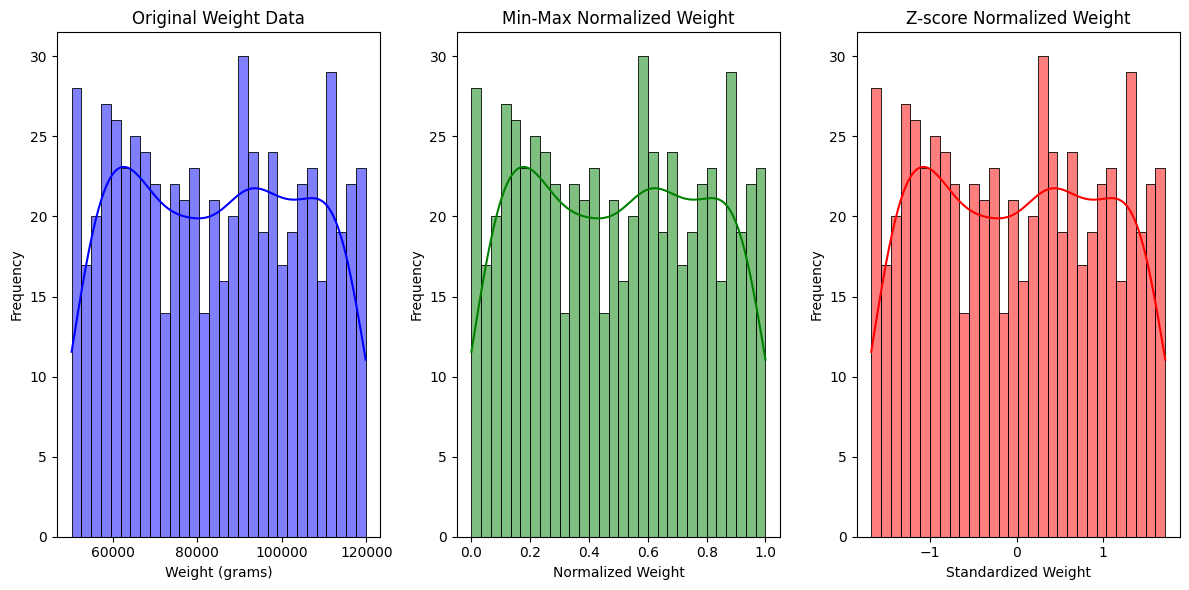

In [14]:
# Plot original and normalized weights
plt.figure(figsize=(12, 6))

# Plot original weights
plt.subplot(1, 3, 1)
sns.histplot(data['Weight'], bins=30, kde=True, color='blue')
plt.title('Original Weight Data')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')

# Plot Min-Max normalized weights
plt.subplot(1, 3, 2)
sns.histplot(data['Weight_MinMax'], bins=30, kde=True, color='green')
plt.title('Min-Max Normalized Weight')
plt.xlabel('Normalized Weight')
plt.ylabel('Frequency')

# Plot Z-score normalized weights
plt.subplot(1, 3, 3)
sns.histplot(data['Weight_Zscore'], bins=30, kde=True, color='red')
plt.title('Z-score Normalized Weight')
plt.xlabel('Standardized Weight')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()
